## Asymmetric Two Photon Lineshape

We have seen in experiment and simulation that there is a very asymmetric two photon lineshape. In this document, I am investigating this phenomenon further. Here, I will use the `IntegrateSchrodingerEquation` class that can be found in the `./acme/Simulations/code/simulations.py` file.

In [6]:
%matplotlib inline
import sys
sys.path.append('./code')

from simulations import IntegrateSchrodingerEquation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
import numpy as np

### when does the asymmetric two photon lineshape occur?
- It doesn't matter whether or not the spatial intensity profiles have lobes of intensity in the tails or not.
- It occurs when we are sitting off one photon resonance.
- The asymmetry in the lineshape is caused by the asymmetry in the laser spatial intensities between the two beams.
- It doesn't matter whether or not there is decay (not caused by optical pumping)

In [62]:
gaussian = lambda t, t0, dt: np.exp(-(t - t0)**2/(2 * dt**2))

T = 30*10**(-6)
N = 750

t = np.linspace(-T, T, N)

width = T/6.0
sep   = T/6.0
Omega = 6 * 2 * np.pi * 10**6
I_asym = .75
omega0 =     I_asym * gaussian(t, +sep, width) * Omega
omega1 = (1/I_asym) * gaussian(t, -sep, width) * Omega

Gamma = 1 / (500 * 10**(-9))
Delta = 6 * 2 * np.pi * 10**6


energy = lambda delta: {'X': -delta, 
                        'C': Delta - 1j*Gamma/2,
                        'H': delta}

omega = {('X','C'): omega0,
         ('C','H'): omega1}

Integrate the Schrodinger equation under these conditions and view the time variation of the population in H

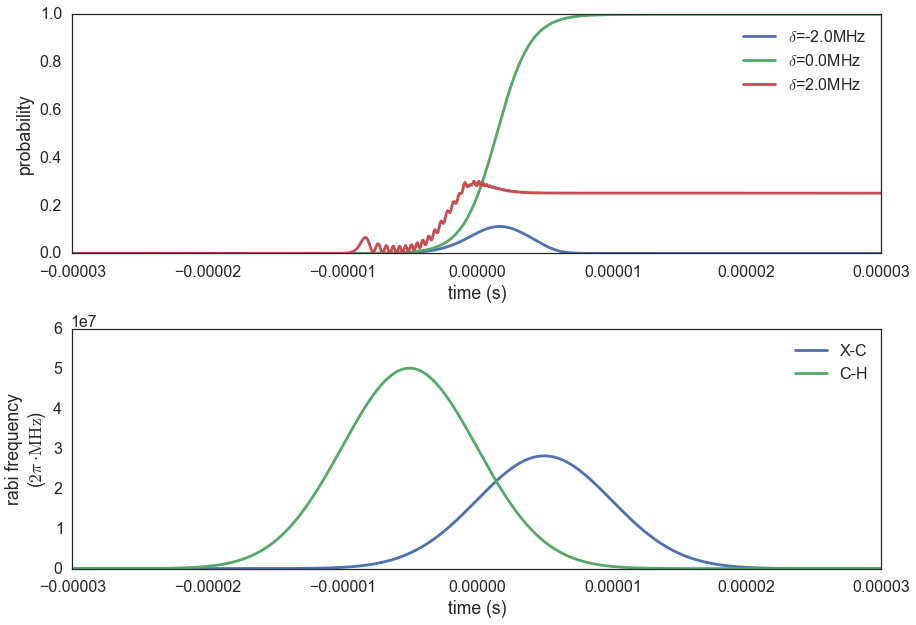

In [63]:
delta = np.linspace(-2, 2, 3) * 2 * np.pi * 10**6

ISE = IntegrateSchrodingerEquation.parameter_sweep(delta,
                                                   t=t,
                                                   energy=energy,
                                                   omega =omega,
                                                   psi0 = {'X':1, 'C':0, 'H':0},
                                                   final_state=False,
                                                   parallelize=False)

plt.subplot(2,1,1)
for ise, d in zip(ISE, delta):
    ise.plot(states={('$\delta$='+str(d/(2 * np.pi* 10**6)) + 'MHz'):[0,0,1]}, plot_norm=False)
plt.subplot(2,1,2)
ISE[0].plot_omega()
plt.tight_layout()

Here is a closer look at all of the time evolution of the state:

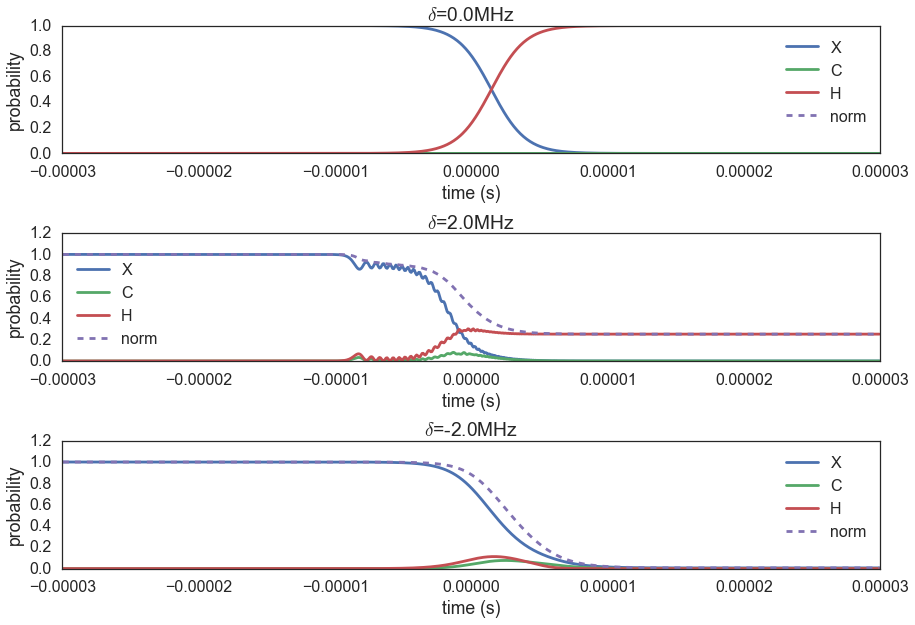

In [64]:
index = 0
for ise, d in zip(ISE, delta):
    plt.subplot(len(ISE),1,index)
    ise.plot()
    plt.title(('$\delta$='+str(d/(2 * np.pi* 10**6)) + 'MHz'))
    index += 1
plt.tight_layout()

Perform a finer scan and map out the asymmetric two photon lineshape:

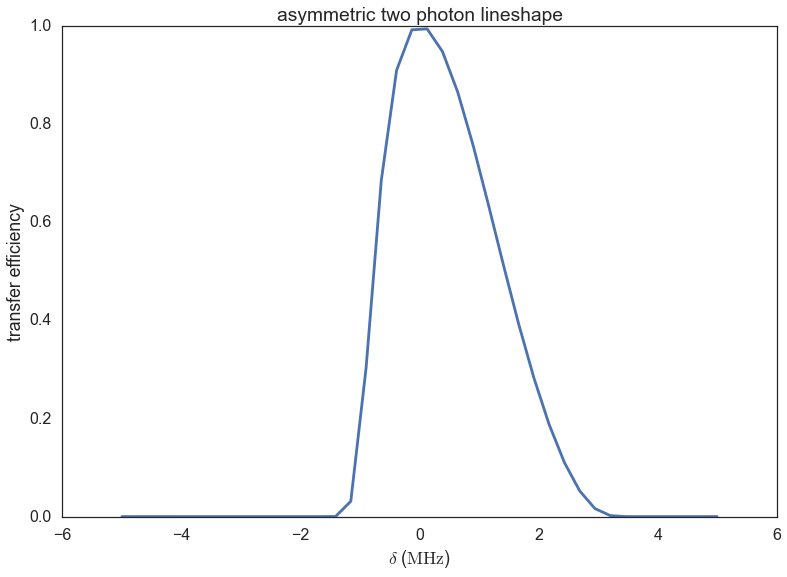

In [65]:
delta = np.linspace(-5, 5, 40) * 2 * np.pi * 10**6

ISE = IntegrateSchrodingerEquation.parameter_sweep(delta,
                                                   t=t,
                                                   energy=energy,
                                                   omega =omega,
                                                   psi0 = {'X':1, 'C':0, 'H':0},
                                                   final_state=True,
                                                   parallelize=False)

final_state = np.array([0,0,1])
ISE = np.array(ISE)
P = np.abs(np.dot(ISE,final_state))**2

plt.plot(delta/(2 * np.pi * 10**6), P)
plt.xlabel('$\\delta$ ($\\rm{MHz}$)')
plt.ylabel('transfer efficiency')
_ = plt.title('asymmetric two photon lineshape')

## Simple Case

Lets consider a more simplified, less realistic case:

In [86]:
cos = lambda t, phi, dt: np.cos(-np.pi * t / (2 * dt) + phi)**2

T = 10*10**(-6)
N = 750

t = np.linspace(0, T, N)

I_asym = .5
Omega = 6 * 2 * np.pi * 10**6 * (1 + I_asym * (t - np.mean(t))/T)

omega0 = cos(t, np.pi/2.0, T) * Omega
omega1 = cos(t, 0, T) * Omega

Gamma = 1 / (500 * 10**(-9))
Delta = 6 * 2 * np.pi * 10**6

energy = lambda delta: {'X': -delta, 
                        'C': Delta - 1j*Gamma/2,
                        'H': delta}

omega = {('X','C'): omega0,
         ('C','H'): omega1}

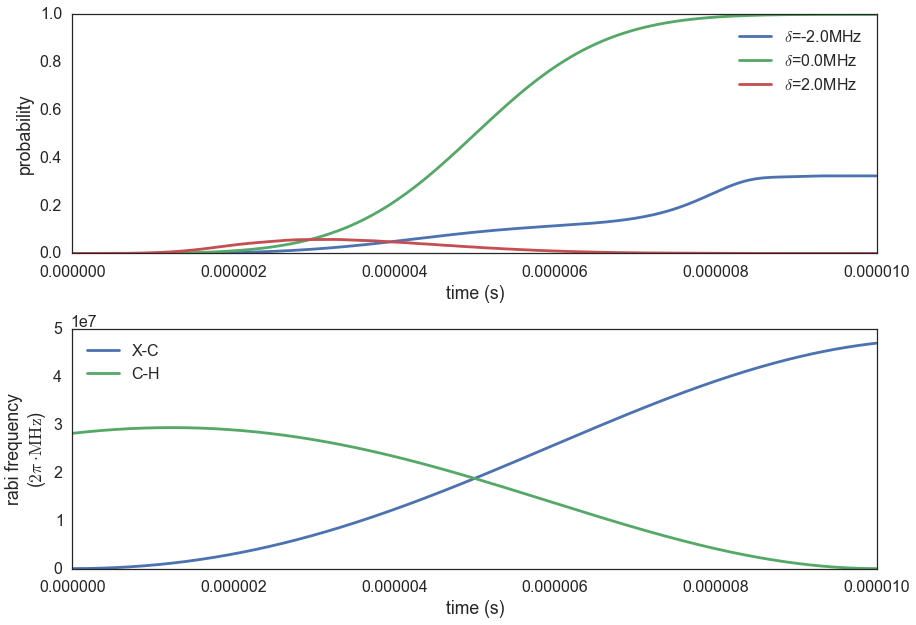

In [87]:
delta = np.linspace(-2, 2, 3) * 2 * np.pi * 10**6

ISE = IntegrateSchrodingerEquation.parameter_sweep(delta,
                                                   t=t,
                                                   energy=energy,
                                                   omega =omega,
                                                   psi0 = {'X':1, 'C':0, 'H':0},
                                                   final_state=False,
                                                   parallelize=False)

plt.subplot(2,1,1)
for ise, d in zip(ISE, delta):
    ise.plot(states={('$\delta$='+str(d/(2 * np.pi* 10**6)) + 'MHz'):[0,0,1]}, plot_norm=False)
plt.subplot(2,1,2)
ISE[0].plot_omega()
plt.tight_layout()

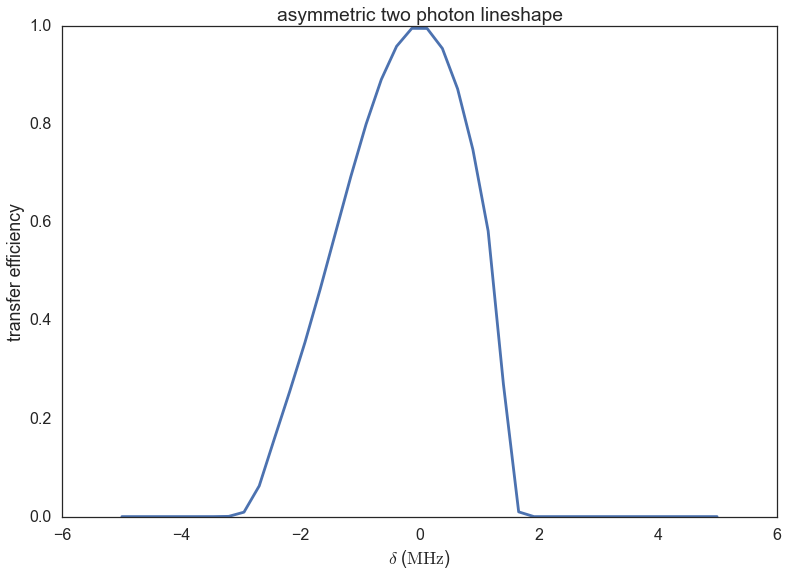

In [88]:
delta = np.linspace(-5, 5, 40) * 2 * np.pi * 10**6

ISE = IntegrateSchrodingerEquation.parameter_sweep(delta,
                                                   t=t,
                                                   energy=energy,
                                                   omega =omega,
                                                   psi0 = {'X':1, 'C':0, 'H':0},
                                                   final_state=True,
                                                   parallelize=False)

final_state = np.array([0,0,1])
ISE = np.array(ISE)
P = np.abs(np.dot(ISE,final_state))**2

plt.plot(delta/(2 * np.pi * 10**6), P)
plt.xlabel('$\\delta$ ($\\rm{MHz}$)')
plt.ylabel('transfer efficiency')
_ = plt.title('asymmetric two photon lineshape')